In [1]:
import numpy as np
import sys
import math 
from numpy.linalg import norm
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [ ]:
# Classification Part

In [2]:
def batch_perceptron ( X , Y,w):
    

    n = X.shape[1]      
    alpha=1                                #learning rate (default=1)
    e = sys.float_info.epsilon
    norm_delta=[]
    epoch=0                              # no. of iterations (Complete passes)
    delta = np.ones(n)
    w_update = [ ]                      # array containing the updated value of W
    
    
    while ( norm(delta,1) > e):
        delta = np.zeros(n)
        
        for i in range(len(X)):
            
            if Y[i] *(w.dot(X[i]))<= 0:
                
                delta = delta - ( Y[i] * X[i] )
            
        delta = delta/len(X)
        norm_delta.append(norm(delta,1))      # get norm of delta and add them to a new array
        epoch=epoch +1                         # No. of Complete passes through dataset 
        w = w - (alpha * delta)                 # update value of w and add it to w_update
        w_update.append(w)
        
        if(epoch >60):                     # Used as the function enters an infinite for loop
                                            # when no. of epoch increases highly, so we try to limit them
            break
        
        
            
    return w ,  w_update, epoch, norm_delta

In [3]:
def online_batch_perceptron ( X , Y ,w):
  
        
    online_n  = X.shape[1]       
    alpha=1 
    online_data_length = len(X)
    online_e = sys.float_info.epsilon
    online_delta = np.ones(online_n)
    online_w_steps = [ ]
    online_norm_delta=[] 
    online_epoch=0
    
    while ( norm(online_delta,1) > online_e):
        
        online_delta = np.zeros(online_n)
        
        for i in range(len(X)):
            
       
            if Y[i] *(w.dot(X[i]))<= 0:
                
                online_delta = online_delta - ( Y[i] * X[i] )
                online_delta = online_delta/online_data_length
                  
                w = w - (alpha * online_delta)             # weights value are updated in each iteration
                online_w_steps.append(w)
                       
                
        online_norm_delta.append(norm(online_delta,1))         
        online_epoch=online_epoch+1
        
        if(online_epoch > 60):                   # Used as the function enters an infinite for loop
                                               # when no. of epoch increases highly, so we try to limit them    
            break
        
       
    return w ,  online_w_steps, online_epoch, online_norm_delta

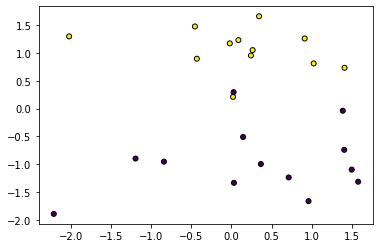

In [25]:
X,Y = make_classification(25, n_features=2,n_redundant=0, n_informative=1, n_clusters_per_class=1)

mask_for_y=Y==0
Y[mask_for_y]=-1
plt.scatter(X[:,0], X[:,1], marker='o',c=Y,s=25, edgecolor='k')

In [26]:
# splitting the data intp 75% training data & 25% testing data
# if test_size is swet to be 0.25, the training data is automatically set to be 0.75

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [27]:
sign = lambda X_train: math.copysign(1,X_train)

In [28]:
N = X_train.shape[1]
Weight = np.random.uniform(-1, 1, N)

In [29]:
w ,  w_update , epoch, norm_delta  = batch_perceptron( X_train , Y_train ,Weight)

In [30]:
Online_w ,  Online_w_update , Online_epoch, Online_norm_delta  = online_batch_perceptron( X_train,Y_train, Weight)

In [31]:
#Batch Algorithm
print('Value of W after all iterations: ',w)                        # Random values of w after all iterations
print('No. of times weights are updated: ', len(w_update))          # no. of times the algorithm updates the weights
print('No. of times delta value is updated: ', len(norm_delta))   # no. of times the algorithm updates the deltas
print('Total No. of iterations (epoch) : ', epoch)


Value of W after all iterations:  [-0.3103963  0.447113 ]
No. of times weights are updated:  61
No. of times delta value is updated:  61
Total No. of iterations (epoch) :  61


In [32]:
#Online training
print('Value of W after all iterations: ',Online_w)                        # Random values of w after all iterations
print('No. of times weights are updated: ', len(Online_w_update))          # no. of times the algorithm updates the weights
print('No. of times delta value is updated: ', len(Online_norm_delta))   # no. of times the algorithm updates the deltas
print('Total No. of iterations (epoch) : ', Online_epoch)


Value of W after all iterations:  [-0.02112768  0.13187516]
No. of times weights are updated:  64
No. of times delta value is updated:  61
Total No. of iterations (epoch) :  61


In [33]:
for x in X_train:
    sign(w.dot(x))

In [34]:
for x in X_train:
    sign( Online_w.dot(x) )

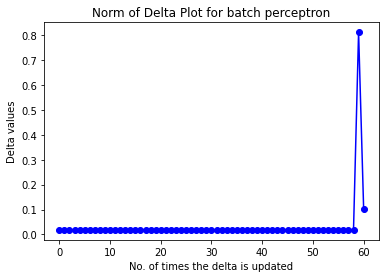

In [35]:
plt.plot(norm_delta,'ob-')            # final delta values
plt.title('Norm of Delta Plot for batch perceptron')
plt.xlabel('No. of times the delta is updated')
plt.ylabel('Delta values')
plt.show()

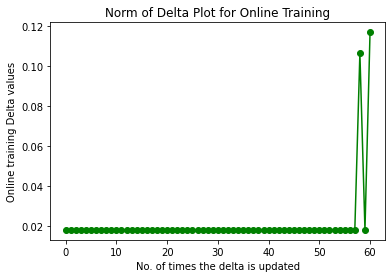

In [36]:
plt.plot(Online_norm_delta,'og-')            # final delta values
plt.title('Norm of Delta Plot for Online Training')
plt.xlabel('No. of times the delta is updated')
plt.ylabel('Online training Delta values')
plt.show()

In [37]:
# Accuracy Calculation

In [38]:
Classifier=LogisticRegression(random_state=0)
Classifier.fit(X_train,Y_train)
y_pred=Classifier.predict(X_test)     # calculation of y_pred to get the model's accuracy
print("Y Predict :", y_pred)            #If Y_predict is not equal Y_Test then the accuracy will be less than 100%
print("Y Test :", Y_test)

Y Predict : [-1 -1 -1 -1  1 -1 -1]
Y Test : [-1 -1 -1 -1  1 -1 -1]


In [39]:
print('Accuracy Percentage of the Model = ', 100* (accuracy_score(Y_test, y_pred)))

Accuracy Percentage of the Model =  100.0


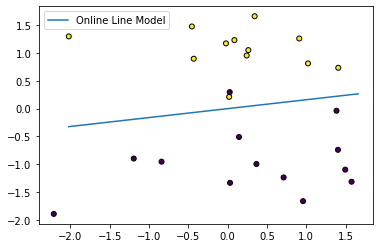

In [42]:
#Visualising the training set result for Online Algorithm

plt.scatter(X[:,0], X[:,1], marker='o',c=Y,s=25, edgecolor='k')

x_values = [np.min(X_train[:, 0]), np.max(X_train[:,1])]

y_values= -(np.dot(Online_w[0],x_values))/Online_w[1]

plt.plot(x_values, y_values, label='Online Line Model')
plt.legend()
plt.show()



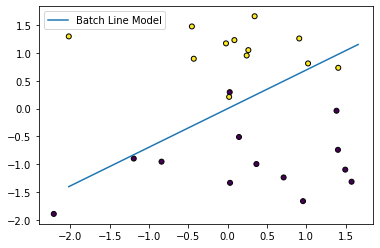

In [43]:
#Visualising the training set result for Batch Algorithm

plt.scatter(X[:,0], X[:,1], marker='o',c=Y,s=25, edgecolor='k')

x_values = [np.min(X_train[:, 0]), np.max(X_train[:,1])]

y_values= -(np.dot(w[0],x_values))/w[1]

plt.plot(x_values, y_values, label='Batch Line Model')
plt.legend()
plt.show()
